<h1 align=center><font size = 5>Assignment : Segmenting and Clustering Neighborhoods in Toronto</font></h1>

Note: As I have to submit the notebook three times, therefore; according to the instruction, I am labeling my work for each part  in order to make it easy for grading.

Importing all relevant libraries for this assignment

In [3]:
!pip install beautifulsoup4
!pip install lxml

import requests 
import pandas as pd
import numpy as np 
import random 

from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('All relevant libraries imported and installed.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

<h1 align=center><font size = 5>Part 1</font></h1>

Wikipedia page scraping for the table of postal codes of Canada

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postcode,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Queen's Park,Not assigned
M8A,Not assigned,Not assigned
M9A,Queen's Park,Queen's Park


The html table is converted to Pandas DataFrame for cleaning and preprocessing.

In [5]:
dfs = pd.read_html(tab)
df = dfs[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Data preprocessing and cleaning

In [6]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postal code area
df2 = df1.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

df2

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Queen's Park,Queen's Park
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [7]:
# use the .shape method to print the number of rows of this dataframe.

df2.shape

(103, 3)

<h1 align=center><font size = 5>Part 2</font></h1>

I have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, I need to get the latitude and the longitude coordinates of each neighborhood. For using the Geocoder package, linking the csv file that has the geographical coordinates of each postal code area. 

In [8]:
lat_lon = pd.read_csv('http://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
# merging the above two tables 

lat_lon.rename(columns={'Postal Code':'Postcode'},inplace=True)
df3 = pd.merge(df2,lat_lon,on='Postcode')
df3.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


<h1 align=center><font size = 5>Part 3</font></h1>

Explore and cluster the neighborhoods in Toronto. Getting all the rows from the data frame which have name Toronto work with only Borough. 

In [10]:
df4 = df3[df3['Borough'].str.contains('Toronto',regex=False)]
df4

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
31,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259
36,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752


Visualizing all the Neighbourhoods of the above data frame using Folium

In [11]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df4['Latitude'],df4['Longitude'],df4['Borough'],df4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

Below is the image of a map if the original one is not displayed in Github

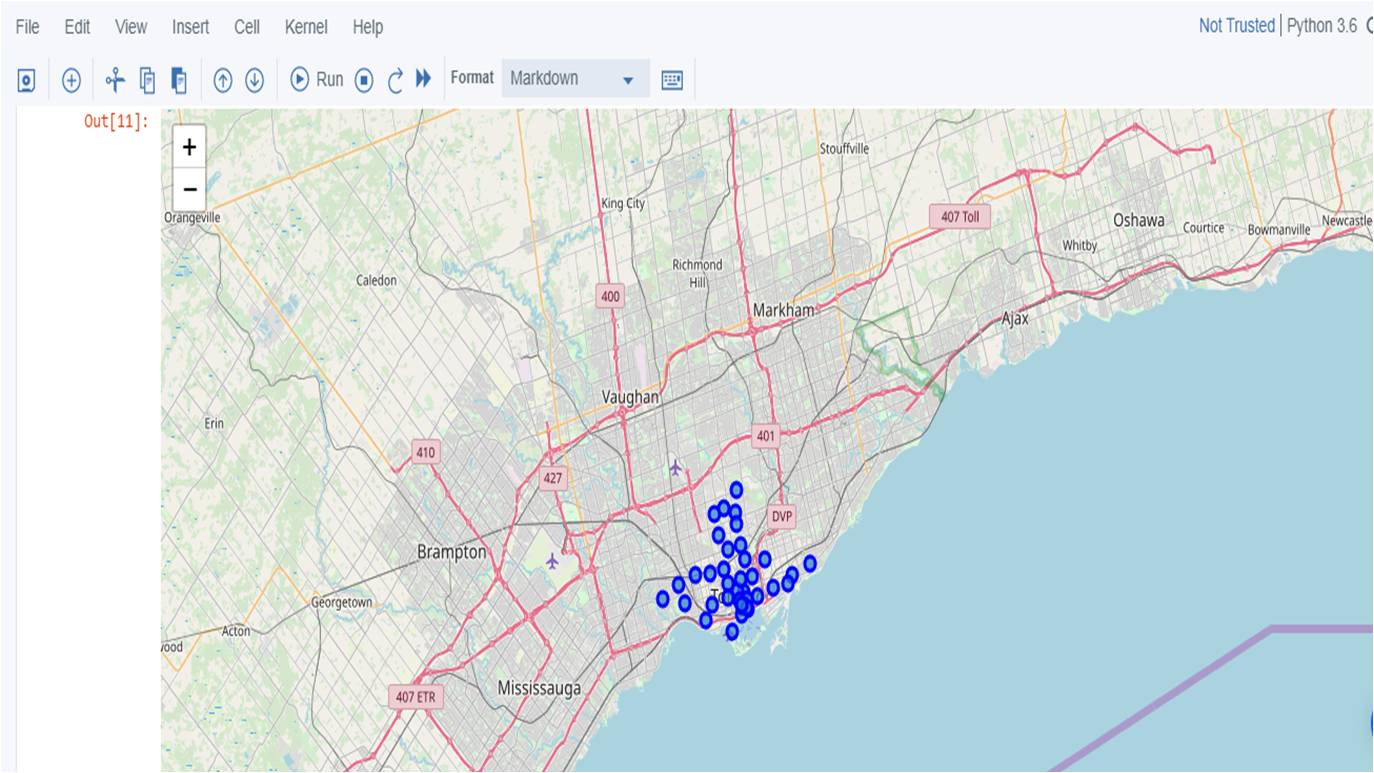

Using KMeans for the clsutering of the neighbourhoods

In [17]:
# set number of clusters
k = 5

toronto_clustering = df4.drop(['Postcode','Borough','Neighbourhood'],1)

# run k-means clustering

kmeans = KMeans(n_clusters = kclusters,random_state=0).fit(toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 3, 0, 0, 2, 0, 4, 0], dtype=int32)

In [20]:
df4

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
9,0,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,4,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,1,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
31,2,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259
36,0,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752


In [18]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df4['Latitude'], df4['Longitude'], df4['Neighbourhood'], df4['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Below is the image of a map (map_clusters) if the original one is not displayed in Github

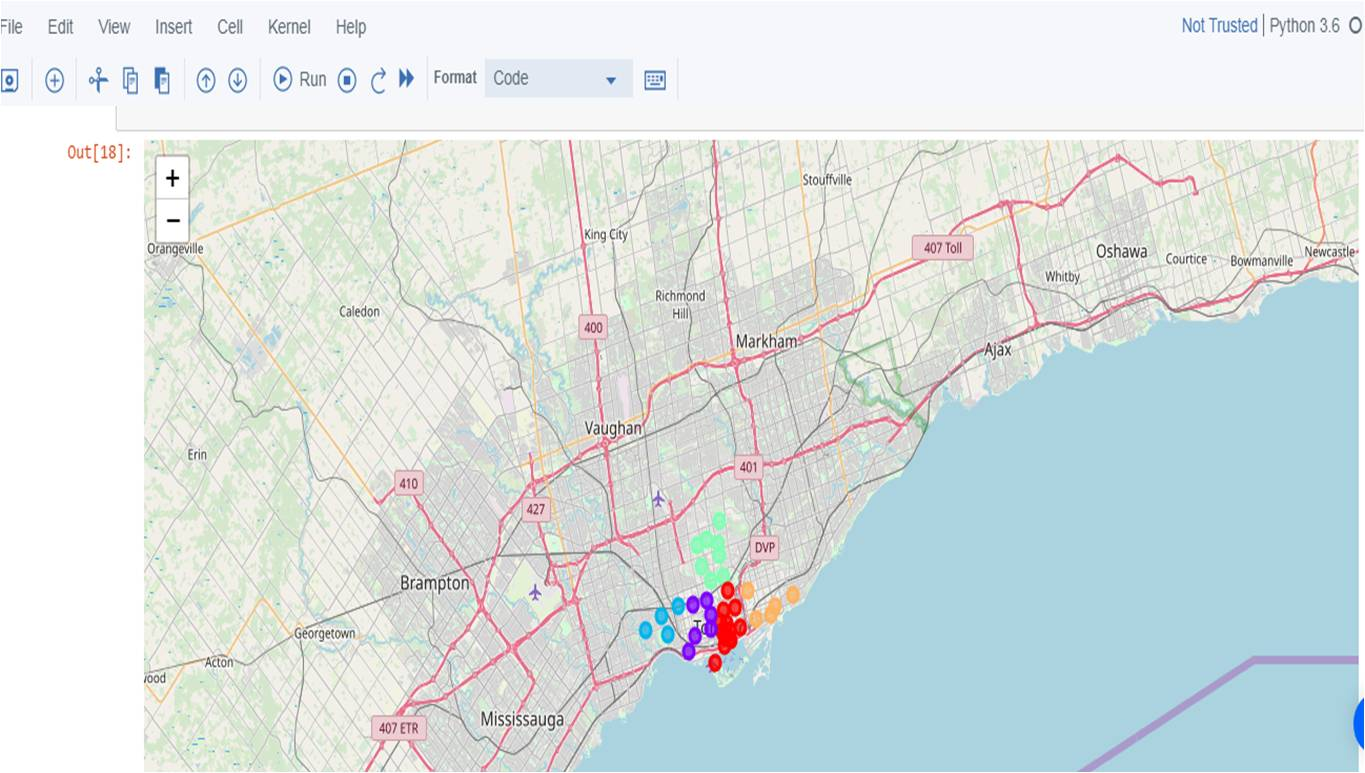